## <font size=5> <strong>AI-Driven Patient Classification for Efficient Specialist Referral System using Blood Test Results

# 💡 Note:
This notebook is designed to run within a Conda environment.  
Please use the provided `environment.yml` file to recreate the exact same environment.

## I. Importing essential libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Data handling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## II. Load Dataset

In [3]:
dataset = pd.read_csv("health_markers_dataset.csv")

## III. Exploratory Data Analysis

In [4]:
dataset

,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV,Condition
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,Anemia
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,Fit
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,Fit
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,Fit
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,Fit
...,...,...,...,...,...,...,...,...,...,...
24995,117.34,6.11,93.06,79.40,150.88,34.42,204.24,12.41,83.85,High_Cholesterol
24996,82.48,6.28,109.86,70.31,97.31,42.23,175.17,12.34,91.20,Fit
24997,113.66,4.91,128.39,70.60,68.71,51.88,63.20,15.23,90.05,Fit
24998,98.63,4.65,173.95,107.52,91.41,51.57,81.11,15.01,82.52,Hypertension


#### Description

In [5]:
dataset.describe()

,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV
count,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000
mean,102.764531,5.509865,112.784860,72.122061,100.342001,48.910538,126.284489,13.809394,87.346819
std,26.638242,1.089084,16.397005,9.621925,34.707913,7.352030,65.675811,1.535363,5.759370
min,70.010000,4.000000,90.000000,60.000000,50.000000,20.050000,50.010000,6.000000,60.000000
25%,84.200000,4.680000,100.600000,65.420000,73.670000,44.080000,83.770000,12.890000,83.520000
50%,98.360000,5.360000,111.100000,70.750000,97.440000,49.430000,117.760000,13.930000,87.700000
75%,111.800000,6.050000,121.510000,76.100000,121.120000,54.770000,152.000000,14.960000,91.830000
max,199.950000,9.000000,180.000000,109.990000,250.000000,60.000000,499.800000,16.000000,96.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Blood_glucose  24838 non-null  float64
 1   HbA1C          24838 non-null  float64
 2   Systolic_BP    24838 non-null  float64
 3   Diastolic_BP   24838 non-null  float64
 4   LDL            24838 non-null  float64
 5   HDL            24838 non-null  float64
 6   Triglycerides  24838 non-null  float64
 7   Haemoglobin    24838 non-null  float64
 8   MCV            24838 non-null  float64
 9   Condition      25000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [7]:
info = [
    "Blood Glucose – Measures blood sugar levels.",
    "HbA1C – Indicator of long-term blood sugar control.",
    "Systolic Blood Pressure – Top value in blood pressure reading.",
    "Diastolic Blood Pressure – Bottom value in blood pressure reading.",
    "LDL – Low-density lipoprotein (bad cholesterol).",
    "HDL – High-density lipoprotein (good cholesterol).",
    "Triglycerides – Type of fat in the blood.",
    "Haemoglobin – Oxygen-carrying protein in red blood cells.",
    "MCV (Mean Corpuscular Volume) – Average size of red blood cells.",
    "Condition – Health condition label (Fit, Diabetes, Anemia, etc.)"
]

for i in range(len(info)):
    print(f"{dataset.columns[i]}:\t{info[i]}")

Blood_glucose:	Blood Glucose – Measures blood sugar levels.
HbA1C:	HbA1C – Indicator of long-term blood sugar control.
Systolic_BP:	Systolic Blood Pressure – Top value in blood pressure reading.
Diastolic_BP:	Diastolic Blood Pressure – Bottom value in blood pressure reading.
LDL:	LDL – Low-density lipoprotein (bad cholesterol).
HDL:	HDL – High-density lipoprotein (good cholesterol).
Triglycerides:	Triglycerides – Type of fat in the blood.
Haemoglobin:	Haemoglobin – Oxygen-carrying protein in red blood cells.
MCV:	MCV (Mean Corpuscular Volume) – Average size of red blood cells.
Condition:	Condition – Health condition label (Fit, Diabetes, Anemia, etc.)


## Feature Correlation Analysis

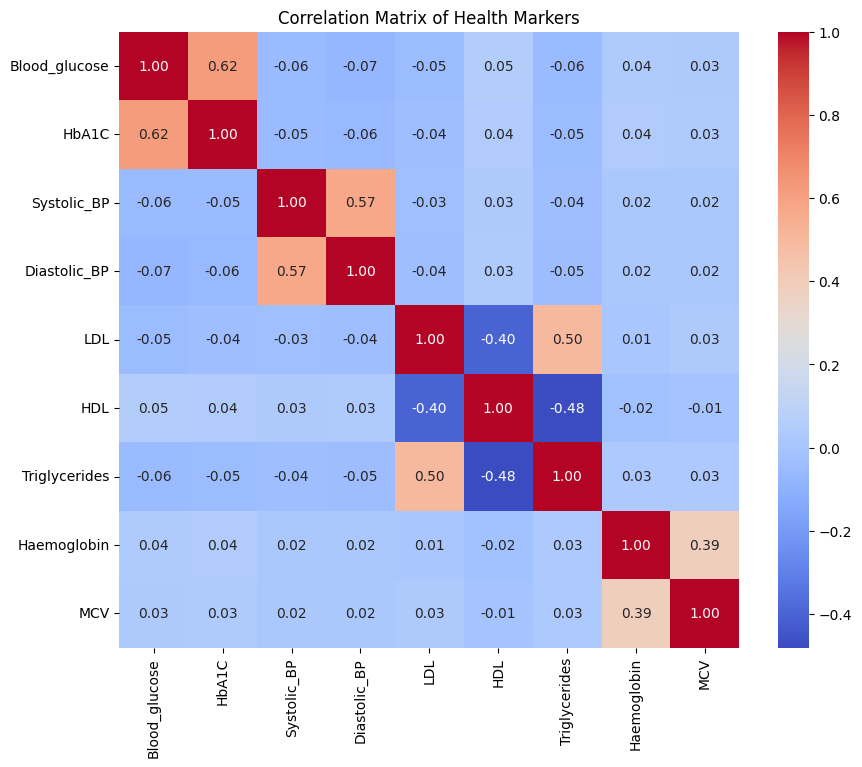

In [8]:
# Compute correlation matrix
corr = dataset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Health Markers")
plt.show()

## IIII. Preproccessing

##  Handle Missing Values

In [9]:
print("Missing values :\n", dataset.isnull().sum())
print("\Dataset shape:", dataset.shape)

Missing values :
 Blood_glucose    162
HbA1C            162
Systolic_BP      162
Diastolic_BP     162
LDL              162
HDL              162
Triglycerides    162
Haemoglobin      162
MCV              162
Condition          0
dtype: int64
\Dataset shape: (25000, 10)


We can observe that the dataset has missing values

In [10]:
# Drop rows with any missing values
dataset.dropna(inplace=True)

In [11]:
# Confirm all missing values are removed
print("Missing values after drop:\n", dataset.isnull().sum())
print("\nUpdated dataset shape:", dataset.shape)

Missing values after drop:
 Blood_glucose    0
HbA1C            0
Systolic_BP      0
Diastolic_BP     0
LDL              0
HDL              0
Triglycerides    0
Haemoglobin      0
MCV              0
Condition        0
dtype: int64

Updated dataset shape: (23574, 10)


We can see that there are no more missing values

### Let's Check for duplicates

In [12]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Length: 23574, dtype: bool

In [13]:
dataset.duplicated().sum()

np.int64(0)

We can see that we don't have any duplicates

### Let's Encode the target veriable "condition":

In [14]:
dataset["Condition"].unique()

array(['Anemia', 'Fit', 'Hypertension', 'Diabetes', 'High_Cholesterol'],
      dtype=object)

In [15]:
# Copy dataset for encoding
encoded_df = dataset.copy()

# Initialize encoder and apply it
label_encoder = LabelEncoder()
encoded_df["Condition_encoded"] = label_encoder.fit_transform(encoded_df["Condition"])

In [16]:
# Create and display mapping of labels
label_mapping = pd.DataFrame({
    "Condition": dataset["Condition"],
    "Encoded": encoded_df["Condition_encoded"]
}).drop_duplicates().sort_values(by="Encoded").reset_index(drop=True)

print("Label Encoding Mapping:\n")
print(label_mapping)

Label Encoding Mapping:

          Condition  Encoded
0            Anemia        0
1          Diabetes        1
2               Fit        2
3  High_Cholesterol        3
4      Hypertension        4


In [17]:
encoded_df

,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV,Condition,Condition_encoded
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,Anemia,0
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,Fit,2
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,Fit,2
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,Fit,2
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,Fit,2
...,...,...,...,...,...,...,...,...,...,...,...
24995,117.34,6.11,93.06,79.40,150.88,34.42,204.24,12.41,83.85,High_Cholesterol,3
24996,82.48,6.28,109.86,70.31,97.31,42.23,175.17,12.34,91.20,Fit,2
24997,113.66,4.91,128.39,70.60,68.71,51.88,63.20,15.23,90.05,Fit,2
24998,98.63,4.65,173.95,107.52,91.41,51.57,81.11,15.01,82.52,Hypertension,4


In [18]:
print("Original value counts:\n", dataset["Condition"].value_counts())
print("\nEncoded value counts:\n", encoded_df["Condition_encoded"].value_counts())

Original value counts:
 Condition
Fit                 16875
Diabetes             2915
Hypertension         1681
High_Cholesterol     1285
Anemia                818
Name: count, dtype: int64

Encoded value counts:
 Condition_encoded
2    16875
1     2915
4     1681
3     1285
0      818
Name: count, dtype: int64


Here we are checking that no extra row/data was made

## V. Train Test split

In [19]:
# 3. Separate features and target
X = encoded_df.drop(["Condition", "Condition_encoded"], axis=1)
y = encoded_df["Condition_encoded"]

In [20]:
# 4. Split BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
# Confirm split shape
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (18859, 9)
Test set size: (4715, 9)


In [22]:
X_train.shape

(18859, 9)

In [23]:
X_test.shape

(4715, 9)

In [24]:
y_train.shape

(18859,)

In [25]:
y_test.shape

(4715,)

#### Let's Check class imbalance: By Analysing the 'Condition' variable

In [26]:
print("Class distribution BEFORE SMOTE:\n")
print(y_train.value_counts())

Class distribution BEFORE SMOTE:

Condition_encoded
2    13500
1     2332
4     1345
3     1028
0      654
Name: count, dtype: int64


In [27]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Find the smallest class count
target_count = y_train.value_counts().min()

# Create sampling strategy to match all classes to the smallest count
sampling_strategy = {label: target_count for label in y_train.value_counts().index}

# Apply undersampling
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Confirm new distribution
print("Class distribution AFTER undersampling:\n")
print(pd.Series(y_train_resampled).value_counts())

Class distribution AFTER undersampling:

Condition_encoded
0    654
1    654
2    654
3    654
4    654
Name: count, dtype: int64


we can observe that there are no more class imbalance and we have equal value of rows for each column

### standardizing the training data

In [28]:
# Optional: View a sample before scaling
print("Before Standardisation:\n")
print(pd.DataFrame(X_train_resampled).describe())

Before Standardisation:

       Blood_glucose        HbA1C  Systolic_BP  Diastolic_BP          LDL  \
count    3270.000000  3270.000000  3270.000000   3270.000000  3270.000000   
mean      107.769339     5.698664   118.996740     76.017933   114.907462   
std        30.901008     1.238345    21.864062     13.274971    48.752768   
min        70.010000     4.000000    90.010000     60.000000    50.020000   
25%        85.550000     4.720000   103.152500     66.362500    77.910000   
50%       100.305000     5.470000   115.070000     72.450000   105.280000   
75%       116.352500     6.250000   126.770000     78.750000   134.155000   
max       199.950000     9.000000   179.990000    109.970000   250.000000   

               HDL  Triglycerides  Haemoglobin          MCV  
count  3270.000000    3270.000000  3270.000000  3270.000000  
mean     46.024456     159.556376    12.928752    84.277254  
std      10.041013     106.155133     2.484206     8.901206  
min      20.070000      50.020000

In [29]:
X_train_resampled

,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV
11995,71.72,6.24,119.59,77.99,112.60,43.38,118.92,6.44,76.47
5874,99.10,4.50,106.30,75.67,137.25,57.73,68.30,7.57,74.73
14750,80.97,4.19,90.47,61.72,50.49,41.73,123.51,6.33,66.14
17596,114.35,4.26,101.77,71.63,115.80,57.17,109.67,10.53,77.34
8493,91.26,6.16,94.53,63.95,56.49,54.77,64.83,9.58,75.28
...,...,...,...,...,...,...,...,...,...
12518,92.08,4.00,148.42,107.23,78.65,50.81,157.15,12.66,88.19
913,78.96,6.23,170.48,91.07,138.67,53.00,119.98,13.99,94.37
5596,88.03,5.10,132.96,108.08,77.35,52.61,71.27,15.57,93.62
23525,94.16,4.39,178.24,108.96,69.94,45.69,62.46,15.18,90.75


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Optional: View a sample after scaling
print("\nAfter Standardisation:\n")
print(pd.DataFrame(X_train_scaled).describe())


After Standardisation:

                  0             1             2             3             4  \
count  3.270000e+03  3.270000e+03  3.270000e+03  3.270000e+03  3.270000e+03   
mean   1.738331e-16  3.476662e-16 -2.433663e-16 -2.085997e-16 -2.433663e-16   
std    1.000153e+00  1.000153e+00  1.000153e+00  1.000153e+00  1.000153e+00   
min   -1.222132e+00 -1.371930e+00 -1.325974e+00 -1.206811e+00 -1.331153e+00   
25%   -7.191590e-01 -7.904203e-01 -7.247813e-01 -7.274524e-01 -7.589953e-01   
50%   -2.415934e-01 -1.846808e-01 -1.796254e-01 -2.688125e-01 -1.975054e-01   
75%    2.778056e-01  4.452883e-01  3.555812e-01  2.058374e-01  3.948593e-01   
max    2.983552e+00  2.666333e+00  2.790085e+00  2.557991e+00  2.771395e+00   

                  5             6             7             8  
count  3.270000e+03  3.270000e+03  3.270000e+03  3.270000e+03  
mean   7.996322e-16  1.390665e-16 -3.824328e-16 -3.824328e-16  
std    1.000153e+00  1.000153e+00  1.000153e+00  1.000153e+00  
min   -

In [32]:
X_train_scaled

array([[-1.16678564,  0.43721182,  0.02713817, ..., -0.38286035,
        -2.61240239, -0.87723485],
       [-0.2805949 , -0.96810394, -0.58080158, ..., -0.85978257,
        -2.15745904, -1.07274388],
       [-0.86739688, -1.21847628, -1.30493148, ..., -0.33961513,
        -2.65668891, -2.03792928],
       ...,
       [-0.63889043, -0.4835123 ,  0.63873746, ..., -0.83180036,
         1.06337883,  1.04976509],
       [-0.44048468, -1.05694574,  2.71003257, ..., -0.9148048 ,
         0.90636298,  0.72728755],
       [-0.83761983,  0.55835972,  1.03533924, ..., -0.66371873,
         0.43531544, -0.42217072]])

In [33]:
X_train_scaled.shape

(3270, 9)

## VI. Model Fitting

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialise and train the model
log_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_model.fit(X_train_resampled, y_train_resampled)

# Training set evaluation
y_train_pred = log_model.predict(X_train_resampled)
print("Logistic Regression Report (Train):")
print(classification_report(y_train_resampled, y_train_pred))

# Test set evaluation
y_test_pred = log_model.predict(X_test)
print("Logistic Regression Report (Test):")
print(classification_report(y_test, y_test_pred))

Logistic Regression Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       654
           1       0.98      0.99      0.99       654
           2       0.98      0.97      0.97       654
           3       1.00      1.00      1.00       654
           4       0.99      1.00      0.99       654

    accuracy                           0.99      3270
   macro avg       0.99      0.99      0.99      3270
weighted avg       0.99      0.99      0.99      3270

Logistic Regression Report (Test):
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       164
           1       0.96      0.99      0.98       583
           2       1.00      0.98      0.99      3375
           3       1.00      1.00      1.00       257
           4       0.95      0.99      0.97       336

    accuracy                           0.99      4715
   macro avg       0.96      0.99      0.97      4715
weight

### Multilayer Perceptron (MLP)

In [35]:
# Initialise and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train_resampled, y_train_resampled)

# Training set evaluation
y_train_pred_mlp = mlp_model.predict(X_train_resampled)
print("MLP Neural Network Report (Train):")
print(classification_report(y_train_resampled, y_train_pred_mlp))

# Test set evaluation
y_test_pred_mlp = mlp_model.predict(X_test)
print("MLP Neural Network Report (Test):")
print(classification_report(y_test, y_test_pred_mlp))


MLP Neural Network Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       654
           1       0.93      1.00      0.96       654
           2       0.98      0.92      0.95       654
           3       1.00      1.00      1.00       654
           4       0.95      1.00      0.98       654

    accuracy                           0.97      3270
   macro avg       0.97      0.97      0.97      3270
weighted avg       0.97      0.97      0.97      3270

MLP Neural Network Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       164
           1       0.81      0.99      0.90       583
           2       1.00      0.94      0.97      3375
           3       0.99      1.00      1.00       257
           4       0.84      1.00      0.91       336

    accuracy                           0.95      4715
   macro avg       0.91      0.97      0.94      4715
weighted

## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialise and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)

# Training set evaluation
y_train_pred_knn = knn_model.predict(X_train_resampled)
print("K-Nearest Neighbors Report (Train):")
print(classification_report(y_train_resampled, y_train_pred_knn))

# Test set evaluation
y_test_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Report (Test):")
print(classification_report(y_test, y_test_pred_knn))

K-Nearest Neighbors Report (Train):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       654
           1       0.99      0.99      0.99       654
           2       0.95      0.96      0.96       654
           3       1.00      1.00      1.00       654
           4       1.00      1.00      1.00       654

    accuracy                           0.98      3270
   macro avg       0.98      0.98      0.98      3270
weighted avg       0.98      0.98      0.98      3270

K-Nearest Neighbors Report (Test):
              precision    recall  f1-score   support

           0       0.53      0.93      0.68       164
           1       0.94      0.97      0.95       583
           2       0.99      0.95      0.97      3375
           3       1.00      1.00      1.00       257
           4       1.00      1.00      1.00       336

    accuracy                           0.96      4715
   macro avg       0.89      0.97      0.92      4715
weight

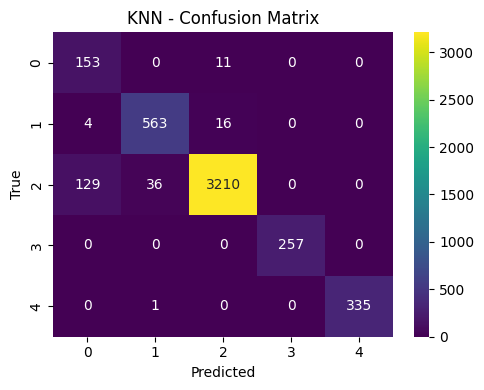

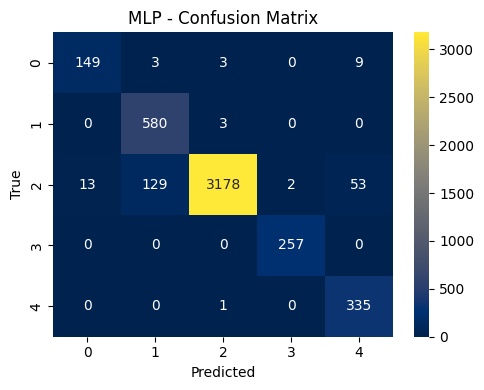

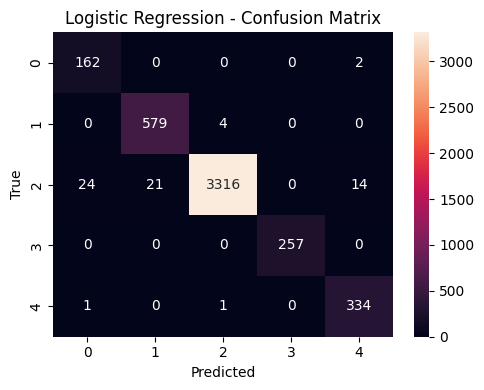

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define your models and corresponding colours
models = {
    "KNN": (knn_model, 'viridis'),
    "MLP": (mlp_model, 'cividis'),
    "Logistic Regression": (log_model, 'rocket')
}


for name, (model, cmap_color) in models.items():
    # Predict on test set
    y_test_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_color)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# DNN

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# One-hot encode resampled y labels for DNN
ohe = OneHotEncoder(sparse_output=False)  # Use sparse_output for newer sklearn
y_ohe = ohe.fit_transform(y_train_resampled.values.reshape(-1, 1))

# Train/validation split on scaled resampled data
X_train_dnn, X_val_dnn, y_train_dnn, y_val_dnn = train_test_split(
    X_train_scaled, y_ohe, test_size=0.2, stratify=y_train_resampled, random_state=42
)

# Build DNN model
dnn_model = Sequential([
    InputLayer(input_shape=(X_train_dnn.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 classes
])

# Compile model
dnn_model.compile(optimizer=Adam(0.0005), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train model
history_dnn = dnn_model.fit(
    X_train_dnn, y_train_dnn,
    validation_data=(X_val_dnn, y_val_dnn),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5264 - loss: 1.2478 - val_accuracy: 0.9664 - val_loss: 0.3552
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9458 - loss: 0.3481 - val_accuracy: 0.9908 - val_loss: 0.0945
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.1347 - val_accuracy: 0.9924 - val_loss: 0.0474
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0815 - val_accuracy: 0.9924 - val_loss: 0.0332
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9866 - loss: 0.0593 - val_accuracy: 0.9939 - val_loss: 0.0264
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9906 - loss: 0.0470 - val_accuracy: 0.9939 - val_loss: 0.0233
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9907 - loss: 0.0391 - val_accuracy: 0.9939 - val_loss: 0.0210
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0315 - val_accuracy: 0.9954 - val_loss:

In [39]:
# Predict on training set
y_train_probs = dnn_model.predict(X_train_scaled)
y_train_labels = np.argmax(y_train_probs, axis=1)

# Evaluate performance on training set
print("🔹 DNN Classification Report (Train Set):")
print(classification_report(y_train_resampled, y_train_labels))

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
🔹 DNN Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       654
           2       1.00      1.00      1.00       654
           3       1.00      1.00      1.00       654
           4       1.00      1.00      1.00       654

    accuracy                           1.00      3270
   macro avg       1.00      1.00      1.00      3270
weighted avg       1.00      1.00      1.00      3270



In [40]:
# Predict test set
y_pred_probs = dnn_model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Evaluate performance
print("DNN Classification Report (Test Set):")
print(classification_report(y_test, y_pred_labels))

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
DNN Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       164
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00      3375
           3       0.99      1.00      0.99       257
           4       1.00      1.00      1.00       336

    accuracy                           1.00      4715
   macro avg       0.99      1.00      1.00      4715
weighted avg       1.00      1.00      1.00      4715



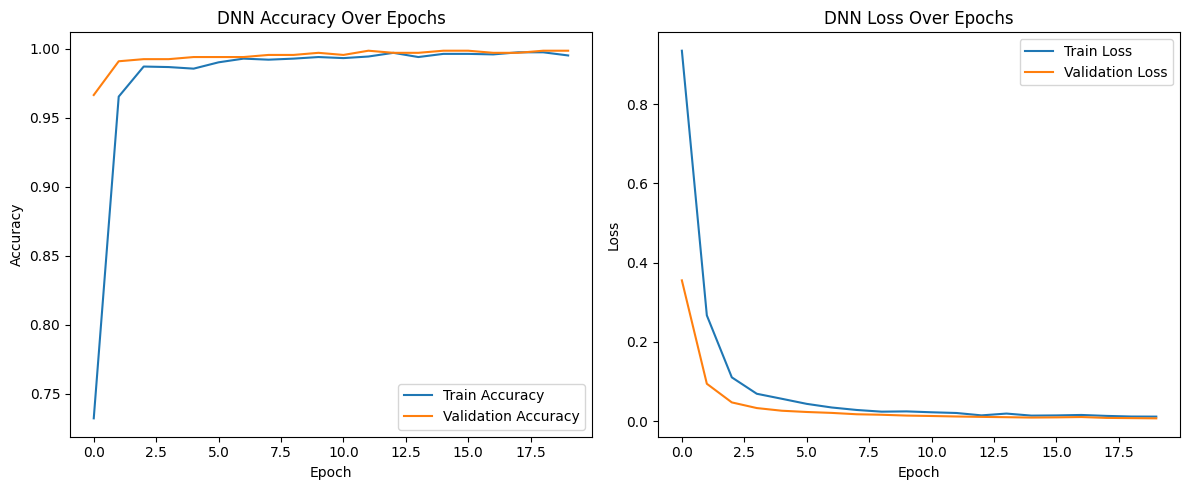

In [41]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Train Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('DNN Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

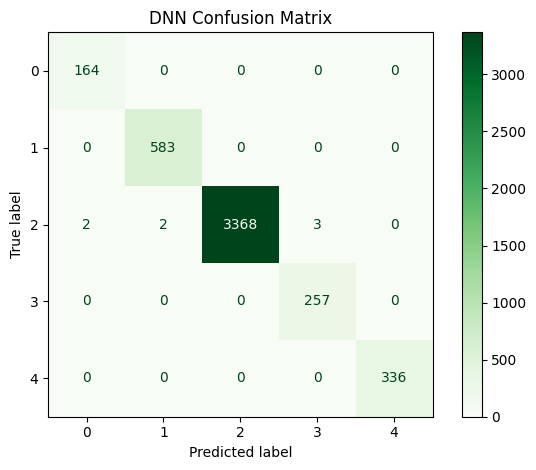

In [42]:
# Confusion Matrix with green colour map
cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens') 
plt.title("DNN Confusion Matrix")
plt.tight_layout()
plt.show()

# TabNet

In [43]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Initialize TabNet model
tabnet_model = TabNetClassifier(seed=42)

# Fit the model using your scaled and resampled training data
tabnet_model.fit(
    X_train=X_train_scaled, y_train=y_train_resampled.values,
    eval_set=[(X_test_scaled, y_test.values)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=20,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

epoch 0  | loss: 1.6257  | val_accuracy: 0.38515 |  0:00:00s
epoch 1  | loss: 0.93033 | val_accuracy: 0.74295 |  0:00:00s
epoch 2  | loss: 0.59075 | val_accuracy: 0.88717 |  0:00:01s
epoch 3  | loss: 0.35238 | val_accuracy: 0.93022 |  0:00:01s
epoch 4  | loss: 0.21986 | val_accuracy: 0.94867 |  0:00:01s
epoch 5  | loss: 0.1331  | val_accuracy: 0.97582 |  0:00:02s
epoch 6  | loss: 0.07527 | val_accuracy: 0.99236 |  0:00:02s
epoch 7  | loss: 0.04315 | val_accuracy: 0.99533 |  0:00:03s
epoch 8  | loss: 0.02547 | val_accuracy: 0.99767 |  0:00:03s
epoch 9  | loss: 0.01973 | val_accuracy: 0.99873 |  0:00:03s
epoch 10 | loss: 0.02164 | val_accuracy: 0.99958 |  0:00:04s
epoch 11 | loss: 0.01601 | val_accuracy: 1.0     |  0:00:04s
epoch 12 | loss: 0.01476 | val_accuracy: 1.0     |  0:00:05s
epoch 13 | loss: 0.0093  | val_accuracy: 1.0     |  0:00:05s
epoch 14 | loss: 0.01132 | val_accuracy: 1.0     |  0:00:05s
epoch 15 | loss: 0.00794 | val_accuracy: 1.0     |  0:00:06s
epoch 16 | loss: 0.008  

In [44]:
from sklearn.metrics import classification_report

# Predictions
y_train_pred_tabnet = tabnet_model.predict(X_train_scaled)
y_test_pred_tabnet = tabnet_model.predict(X_test_scaled)

# Classification Report (Train)
print("\nClassification Report (Train Set):")
print(classification_report(y_train_resampled, y_train_pred_tabnet))

# Classification Report (Test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_tabnet))


Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       654
           2       1.00      1.00      1.00       654
           3       1.00      1.00      1.00       654
           4       1.00      1.00      1.00       654

    accuracy                           1.00      3270
   macro avg       1.00      1.00      1.00      3270
weighted avg       1.00      1.00      1.00      3270


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00      3375
           3       1.00      1.00      1.00       257
           4       1.00      1.00      1.00       336

    accuracy                           1.00      4715
   macro avg       1.00      1.00      1.00      4715
weight

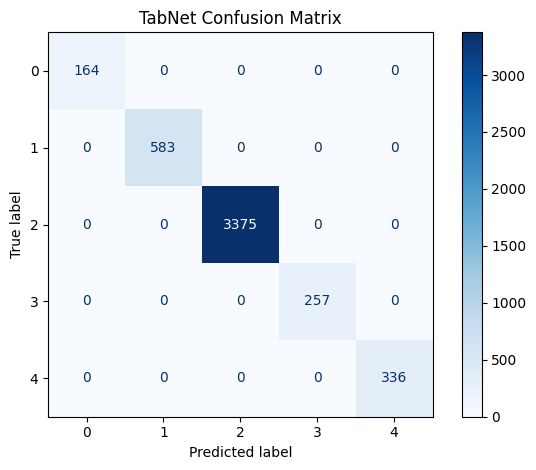

In [45]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_tabnet)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  
plt.title("TabNet Confusion Matrix")
plt.tight_layout()
plt.show()

## VI. Output final score

In [46]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict for DNN
y_train_pred_dnn = np.argmax(dnn_model.predict(X_train_scaled), axis=1)
y_test_pred_dnn = np.argmax(dnn_model.predict(X_test_scaled), axis=1)

# Predict for TabNet
y_train_pred_tabnet = tabnet_model.predict(X_train_scaled)
y_test_pred_tabnet = tabnet_model.predict(X_test_scaled)

# Define dictionary of models and predictions
models = {
    "Logistic Regression": (log_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "K-Nearest Neighbors": (knn_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Multilayer Perceptron": (mlp_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Deep Neural Network (DNN)": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test),
    "TabNet": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test)
}

# Iterate through models
for name, (model, X_train_set, X_test_set, y_train_set, y_test_set) in models.items():
    print(f"\n🔍 {name}")
    
    if model == "custom":
        if "DNN" in name:
            train_acc = accuracy_score(y_train_set, y_train_pred_dnn)
            test_acc = accuracy_score(y_test_set, y_test_pred_dnn)
        elif "TabNet" in name:
            train_acc = accuracy_score(y_train_set, y_train_pred_tabnet)
            test_acc = accuracy_score(y_test_set, y_test_pred_tabnet)
    else:
        train_acc = accuracy_score(y_train_set, model.predict(X_train_set))
        test_acc = accuracy_score(y_test_set, model.predict(X_test_set))
    
    print(f"  📊 Train Accuracy: {train_acc:.4f}")
    print(f"  📊 Test Accuracy:  {test_acc:.4f}")
    
    if abs(train_acc - test_acc) > 0.10:
        if train_acc > test_acc:
            print("  ⚠️ Likely Overfitting (High train, low test)")
        else:
            print("  ⚠️ Likely Underfitting (Low train, low test)")
    else:
        print("  ✅ Good Generalisation (Balanced train/test)")


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step

🔍 Logistic Regression
  📊 Train Accuracy: 0.9884
  📊 Test Accuracy:  0.9858
  ✅ Good Generalisation (Balanced train/test)

🔍 K-Nearest Neighbors
  📊 Train Accuracy: 0.9823
  📊 Test Accuracy:  0.9582
  ✅ Good Generalisation (Balanced train/test)

🔍 Multilayer Perceptron
  📊 Train Accuracy: 0.9691
  📊 Test Accuracy:  0.9542
  ✅ Good Generalisation (Balanced train/test)

🔍 Deep Neural Network (DNN)
  📊 Train Accuracy: 0.9994
  📊 Test Accuracy:  0.9985
  ✅ Good Generalisation (Balanced train/test)

🔍 TabNet
  📊 Train Accuracy: 0.9997
  📊 Test Accuracy:  1.0000
  ✅ Good Generalisation (Balanced train/test)


In [47]:
from sklearn.metrics import precision_score
import numpy as np

# Predict for DNN
y_train_pred_dnn = np.argmax(dnn_model.predict(X_train_scaled), axis=1)
y_test_pred_dnn = np.argmax(dnn_model.predict(X_test_scaled), axis=1)

# Predict for TabNet
y_train_pred_tabnet = tabnet_model.predict(X_train_scaled)
y_test_pred_tabnet = tabnet_model.predict(X_test_scaled)

# Define dictionary of models and predictions
models = {
    "Logistic Regression": (log_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "K-Nearest Neighbors": (knn_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Multilayer Perceptron": (mlp_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Deep Neural Network (DNN)": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test),
    "TabNet": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test)
}

# Iterate through models
for name, (model, X_train_set, X_test_set, y_train_set, y_test_set) in models.items():
    print(f"\n🔍 {name}")
    
    if model == "custom":
        if "DNN" in name:
            train_precision = precision_score(y_train_set, y_train_pred_dnn, average='macro')
            test_precision = precision_score(y_test_set, y_test_pred_dnn, average='macro')
        elif "TabNet" in name:
            train_precision = precision_score(y_train_set, y_train_pred_tabnet, average='macro')
            test_precision = precision_score(y_test_set, y_test_pred_tabnet, average='macro')
    else:
        train_preds = model.predict(X_train_set)
        test_preds = model.predict(X_test_set)
        train_precision = precision_score(y_train_set, train_preds, average='macro')
        test_precision = precision_score(y_test_set, test_preds, average='macro')
    
    print(f"  🎯 Train Precision: {train_precision:.4f}")
    print(f"  🎯 Test Precision : {test_precision:.4f}")
    
    if abs(train_precision - test_precision) > 0.10:
        if train_precision > test_precision:
            print("  ⚠️ Likely Overfitting (High train, low test)")
        else:
            print("  ⚠️ Likely Underfitting (Low train, low test)")
    else:
        print("  ✅ Good Generalisation (Balanced train/test)")


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step

🔍 Logistic Regression
  🎯 Train Precision: 0.9884
  🎯 Test Precision : 0.9568
  ✅ Good Generalisation (Balanced train/test)

🔍 K-Nearest Neighbors
  🎯 Train Precision: 0.9824
  🎯 Test Precision : 0.8930
  ✅ Good Generalisation (Balanced train/test)

🔍 Multilayer Perceptron
  🎯 Train Precision: 0.9704
  🎯 Test Precision : 0.9137
  ✅ Good Generalisation (Balanced train/test)

🔍 Deep Neural Network (DNN)
  🎯 Train Precision: 0.9994
  🎯 Test Precision : 0.9946
  ✅ Good Generalisation (Balanced train/test)

🔍 TabNet
  🎯 Train Precision: 0.9997
  🎯 Test Precision : 1.0000
  ✅ Good Generalisation (Balanced train/test)


In [48]:
from sklearn.metrics import f1_score
import numpy as np

# Predict for DNN
y_train_pred_dnn = np.argmax(dnn_model.predict(X_train_scaled), axis=1)
y_test_pred_dnn = np.argmax(dnn_model.predict(X_test_scaled), axis=1)

# Predict for TabNet
y_train_pred_tabnet = tabnet_model.predict(X_train_scaled)
y_test_pred_tabnet = tabnet_model.predict(X_test_scaled)

# Define dictionary of models and predictions
models = {
    "Logistic Regression": (log_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "K-Nearest Neighbors": (knn_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Multilayer Perceptron": (mlp_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Deep Neural Network (DNN)": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test),
    "TabNet": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test)
}

# Iterate through models
for name, (model, X_train_set, X_test_set, y_train_set, y_test_set) in models.items():
    print(f"\n🔍 {name}")
    
    if model == "custom":
        if "DNN" in name:
            train_f1 = f1_score(y_train_set, y_train_pred_dnn, average='macro')
            test_f1 = f1_score(y_test_set, y_test_pred_dnn, average='macro')
        elif "TabNet" in name:
            train_f1 = f1_score(y_train_set, y_train_pred_tabnet, average='macro')
            test_f1 = f1_score(y_test_set, y_test_pred_tabnet, average='macro')
    else:
        train_preds = model.predict(X_train_set)
        test_preds = model.predict(X_test_set)
        train_f1 = f1_score(y_train_set, train_preds, average='macro')
        test_f1 = f1_score(y_test_set, test_preds, average='macro')
    
    print(f"  🧮 Train F1 Score: {train_f1:.4f}")
    print(f"  🧮 Test F1 Score : {test_f1:.4f}")
    
    if abs(train_f1 - test_f1) > 0.10:
        if train_f1 > test_f1:
            print("  ⚠️ Likely Overfitting (High train, low test)")
        else:
            print("  ⚠️ Likely Underfitting (Low train, low test)")
    else:
        print("  ✅ Good Generalisation (Balanced train/test)")

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step

🔍 Logistic Regression
  🧮 Train F1 Score: 0.9884
  🧮 Test F1 Score : 0.9732
  ✅ Good Generalisation (Balanced train/test)

🔍 K-Nearest Neighbors
  🧮 Train F1 Score: 0.9823
  🧮 Test F1 Score : 0.9203
  ✅ Good Generalisation (Balanced train/test)

🔍 Multilayer Perceptron
  🧮 Train F1 Score: 0.9690
  🧮 Test F1 Score : 0.9378
  ✅ Good Generalisation (Balanced train/test)

🔍 Deep Neural Network (DNN)
  🧮 Train F1 Score: 0.9994
  🧮 Test F1 Score : 0.9971
  ✅ Good Generalisation (Balanced train/test)

🔍 TabNet
  🧮 Train F1 Score: 0.9997
  🧮 Test F1 Score : 1.0000
  ✅ Good Generalisation (Balanced train/test)


In [49]:
from sklearn.metrics import recall_score
import numpy as np

# Predict for DNN
y_train_pred_dnn = np.argmax(dnn_model.predict(X_train_scaled), axis=1)
y_test_pred_dnn = np.argmax(dnn_model.predict(X_test_scaled), axis=1)

# Predict for TabNet
y_train_pred_tabnet = tabnet_model.predict(X_train_scaled)
y_test_pred_tabnet = tabnet_model.predict(X_test_scaled)

# Define dictionary of models and predictions
models = {
    "Logistic Regression": (log_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "K-Nearest Neighbors": (knn_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Multilayer Perceptron": (mlp_model, X_train_resampled, X_test, y_train_resampled, y_test),
    "Deep Neural Network (DNN)": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test),
    "TabNet": ("custom", X_train_scaled, X_test_scaled, y_train_resampled, y_test)
}

# Iterate through models
for name, (model, X_train_set, X_test_set, y_train_set, y_test_set) in models.items():
    print(f"\n🔍 {name}")
    
    if model == "custom":
        if "DNN" in name:
            train_recall = recall_score(y_train_set, y_train_pred_dnn, average='macro')
            test_recall = recall_score(y_test_set, y_test_pred_dnn, average='macro')
        elif "TabNet" in name:
            train_recall = recall_score(y_train_set, y_train_pred_tabnet, average='macro')
            test_recall = recall_score(y_test_set, y_test_pred_tabnet, average='macro')
    else:
        train_preds = model.predict(X_train_set)
        test_preds = model.predict(X_test_set)
        train_recall = recall_score(y_train_set, train_preds, average='macro')
        test_recall = recall_score(y_test_set, test_preds, average='macro')
    
    print(f"  🔁 Train Recall: {train_recall:.4f}")
    print(f"  🔁 Test Recall : {test_recall:.4f}")
    
    if abs(train_recall - test_recall) > 0.10:
        if train_recall > test_recall:
            print("  ⚠️ Likely Overfitting (High train, low test)")
        else:
            print("  ⚠️ Likely Underfitting (Low train, low test)")
    else:
        print("  ✅ Good Generalisation (Balanced train/test)")


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step

🔍 Logistic Regression
  🔁 Train Recall: 0.9884
  🔁 Test Recall : 0.9915
  ✅ Good Generalisation (Balanced train/test)

🔍 K-Nearest Neighbors
  🔁 Train Recall: 0.9823
  🔁 Test Recall : 0.9694
  ✅ Good Generalisation (Balanced train/test)

🔍 Multilayer Perceptron
  🔁 Train Recall: 0.9691
  🔁 Test Recall : 0.9684
  ✅ Good Generalisation (Balanced train/test)

🔍 Deep Neural Network (DNN)
  🔁 Train Recall: 0.9994
  🔁 Test Recall : 0.9996
  ✅ Good Generalisation (Balanced train/test)

🔍 TabNet
  🔁 Train Recall: 0.9997
  🔁 Test Recall : 1.0000
  ✅ Good Generalisation (Balanced train/test)


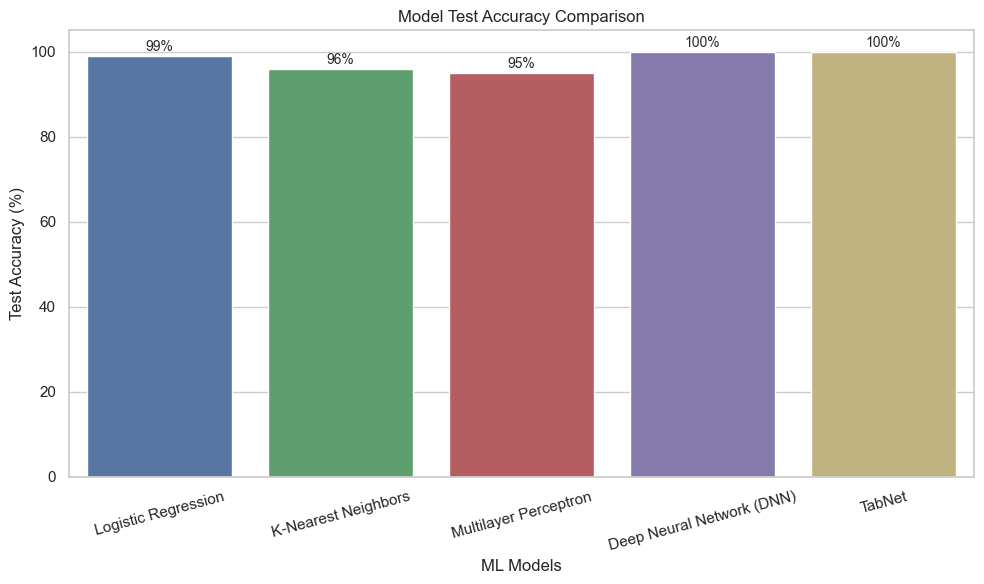

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model names and their corresponding test accuracies (in %)
algorithms = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Multilayer Perceptron",
    "Deep Neural Network (DNN)",
    "TabNet"
]

accuracies = [99, 96, 95, 100, 100]  # In percent

# Custom colours for each bar
palette = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974']

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create bar plot
ax = sns.barplot(x=algorithms, y=accuracies, palette=palette)

# Annotate accuracy values on top of bars
for i, acc in enumerate(accuracies):
    ax.text(i, acc + 0.5, f'{acc}%', ha='center', va='bottom', fontsize=10)

# Labels and titles
plt.ylabel("Test Accuracy (%)")
plt.xlabel("ML Models")
plt.title("Model Test Accuracy Comparison")
plt.ylim(0, 105)
plt.xticks(rotation=15)

# Show plot
plt.tight_layout()
plt.show()

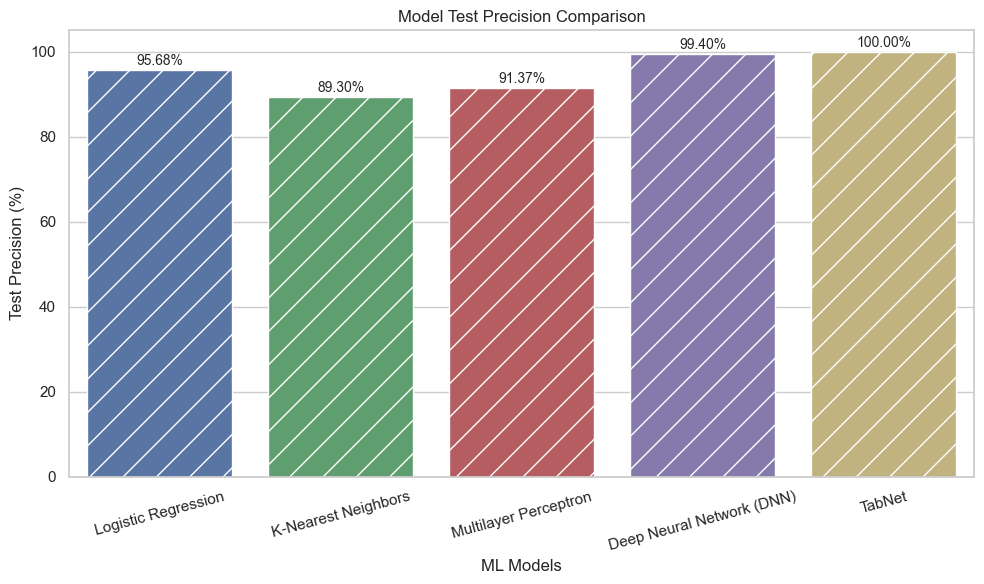

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model names and their corresponding test precision (in %)
algorithms = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Multilayer Perceptron",
    "Deep Neural Network (DNN)",
    "TabNet"
]

# Test precision values (percent)
precisions = [95.68, 89.30, 91.37, 99.40, 100.00]

# Custom colours for each bar
palette = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974']

# Hatch patterns for variety
hatches = ['/', '/', '/', '/', '/']

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create base bar plot
bars = sns.barplot(x=algorithms, y=precisions, palette=palette)

# Apply hatches manually
for bar, hatch in zip(bars.patches, hatches):
    bar.set_hatch(hatch)

# Annotate precision values
for i, prec in enumerate(precisions):
    bars.text(i, prec + 0.5, f'{prec:.2f}%', ha='center', va='bottom', fontsize=10)

# Labels and titles
plt.ylabel("Test Precision (%)")
plt.xlabel("ML Models")
plt.title("Model Test Precision Comparison")
plt.ylim(0, 105)
plt.xticks(rotation=15)

# Show plot
plt.tight_layout()
plt.show()


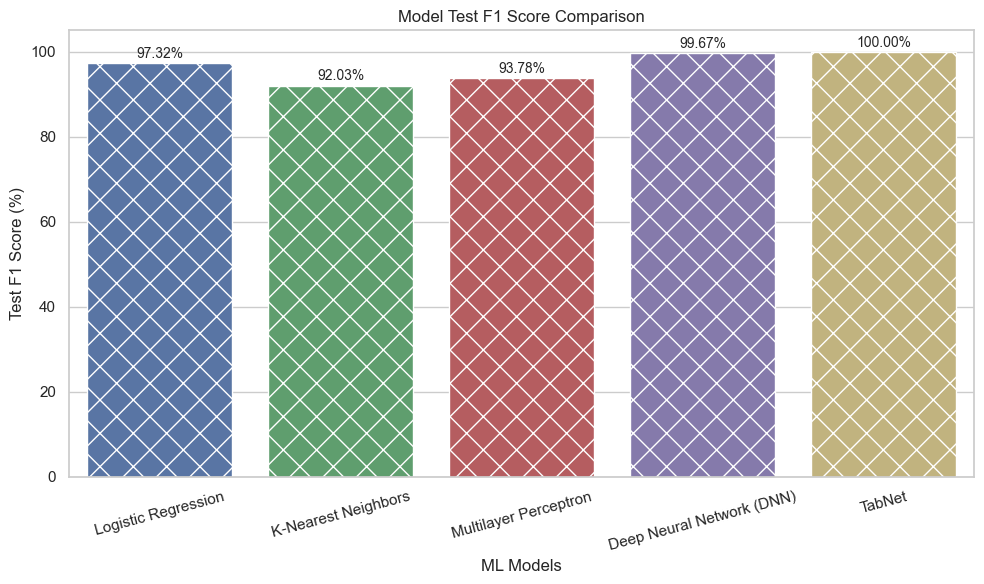

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model names and their corresponding test F1 scores (in %)
algorithms = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Multilayer Perceptron",
    "Deep Neural Network (DNN)",
    "TabNet"
]

# Updated F1 scores (converted to percentages)
f1_scores = [97.32, 92.03, 93.78, 99.67, 100.00]

# Custom colours for each bar
palette = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974']

# Hatch patterns for each bar
hatches = ['x', 'x', 'x', 'x', 'x']

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create bar plot
ax = sns.barplot(x=algorithms, y=f1_scores, palette=palette)

# Apply hatch patterns to each bar
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)

# Annotate F1 values on top of bars
for i, score in enumerate(f1_scores):
    ax.text(i, score + 0.5, f'{score:.2f}%', ha='center', va='bottom', fontsize=10)

# Labels and titles
plt.ylabel("Test F1 Score (%)")
plt.xlabel("ML Models")
plt.title("Model Test F1 Score Comparison")
plt.ylim(0, 105)
plt.xticks(rotation=15)

# Show plot
plt.tight_layout()
plt.show()


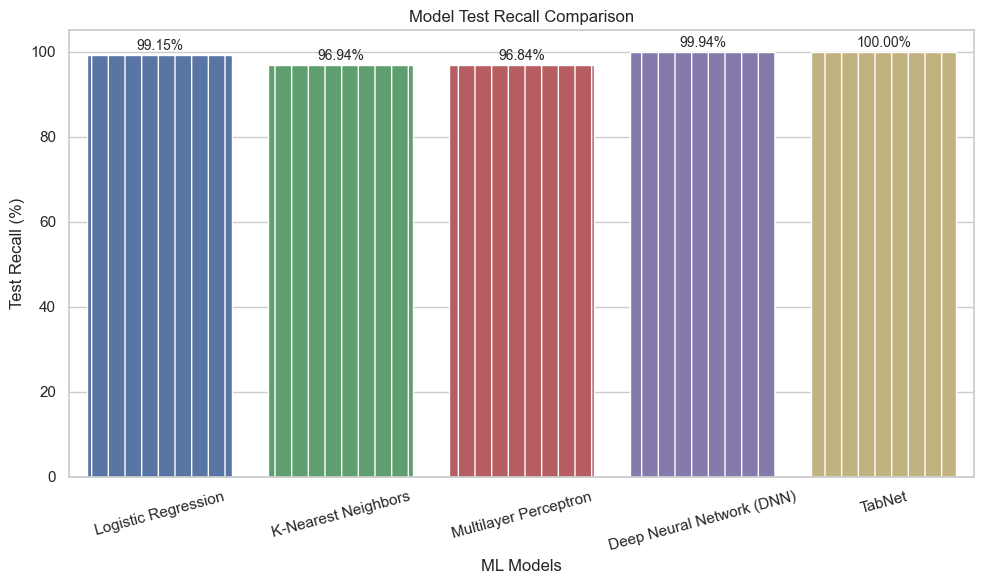

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model names and their corresponding test recall scores (in %)
algorithms = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Multilayer Perceptron",
    "Deep Neural Network (DNN)",
    "TabNet"
]

# Updated recall scores (converted to percentages)
recall_scores = [99.15, 96.94, 96.84, 99.94, 100.00]

# Custom colours for each bar
palette = ["#4c72b090", '#55a868', '#c44e52', '#8172b3', '#ccb974']

# Hatch patterns for each bar
hatches = ['|', '|', '|', '|', '|']

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create bar plot
ax = sns.barplot(x=algorithms, y=recall_scores, palette=palette)

# Apply hatch patterns to each bar
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)

# Annotate recall values on top of bars
for i, score in enumerate(recall_scores):
    ax.text(i, score + 0.5, f'{score:.2f}%', ha='center', va='bottom', fontsize=10)

# Labels and titles
plt.ylabel("Test Recall (%)")
plt.xlabel("ML Models")
plt.title("Model Test Recall Comparison")
plt.ylim(0, 105)
plt.xticks(rotation=15)

# Show plot
plt.tight_layout()
plt.show()


# Referral Interface

In [54]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Step 1: Define your condition mapping
class_labels = {
    0: ("Healthy", None),
    1: ("Diabetes", "Endocrinology"),
    2: ("Cardiovascular Disease", "Cardiology"),
    3: ("Kidney Disease", "Nephrology"),
    4: ("Liver Disease", "Hepatology")
}

# Step 2: Define the function to evaluate the patient
def evaluate_patient(index, model_type='dnn'):
    """
    Given a patient index, predict their condition and print referral info.
    
    Args:
        index (int): Row index from the dataset.
        model_type (str): 'dnn' or 'tabnet'.
    """
    # Ensure valid index
    if index < 0 or index >= len(X):
        print("❌ Invalid index. Please choose between 0 and", len(X)-1)
        return

    # Get the original row
    row_data = X.iloc[index]
    print(f"🔍 Patient Index: {index}")
    print(row_data)
    print("------------")

    # Scale the data
    scaled = scaler.transform([row_data])

    # Predict
    if model_type == 'dnn':
        probs = dnn_model.predict(scaled)
        predicted_class = int(np.argmax(probs))
    elif model_type == 'tabnet':
        predicted_class = int(tabnet_model.predict(scaled)[0])
    else:
        raise ValueError("Model type must be 'dnn' or 'tabnet'")

    # Output results
    condition, department = class_labels[predicted_class]
    if condition == "Healthy":
        print("✅ This patient is Healthy. No referral needed.")
    else:
        print(f"⚠️ Condition Detected: {condition}")
        print(f"📤 Recommended Referral: {department} Department")

In [55]:
evaluate_patient(index=30, model_type='dnn')  #  Or use the modle -> model_type='tabnet'

🔍 Patient Index: 30
Blood_glucose     93.90
HbA1C              4.39
Systolic_BP      118.95
Diastolic_BP      66.49
LDL              137.80
HDL               55.59
Triglycerides     62.52
Haemoglobin       15.15
MCV               93.48
Name: 32, dtype: float64
------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
⚠️ Condition Detected: Cardiovascular Disease
📤 Recommended Referral: Cardiology Department
